In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [12]:
iris=load_iris()
iris_df=pd.read_csv('IRIS.csv')
print(iris_df.head(),'\n')
print(iris_df.species.unique())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [13]:
columns=[0,1,2,3]
X=iris_df[iris_df.columns[columns]]
X.head()
#print(type(X))

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
X_std=StandardScaler().fit_transform(X)
print(X_std[0:4],'\n')
print("Shape after standardizing ",X_std.shape)

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]] 

Shape after standardizing  (150, 4)


In [15]:
X_cov=np.cov(X_std.T)
print("Covariance Matrix \n",X_cov,'\n')
print("Shape of covariance matrix",X_cov.shape)

Covariance Matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]] 

Shape of covariance matrix (4, 4)


In [16]:
eigen_values, eigen_vectors=np.linalg.eig(X_cov)
print("Eigen Values \n",eigen_values,'\n')
print("Eigen Vectors \n",eigen_vectors,'\n')

Eigen Values 
 [2.93035378 0.92740362 0.14834223 0.02074601] 

Eigen Vectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 



In [17]:
total_variance=np.sum(eigen_values)
explained_variance=[(i/total_variance)*100 for i in eigen_values]
print("Variance captured by each component is ",np.round(explained_variance,2),'\n')
cumulative_variance=np.cumsum(explained_variance)
print("Cumulative Variance of each component",np.round(cumulative_variance,3))

Variance captured by each component is  [72.77 23.03  3.68  0.52] 

Cumulative Variance of each component [ 72.77   95.801  99.485 100.   ]


In [18]:
matrix_P=np.round(eigen_vectors[:,:2],3)
matrix_P.shape

(4, 2)

In [19]:
Y=X_std.dot(matrix_P)
Y.shape

(150, 2)

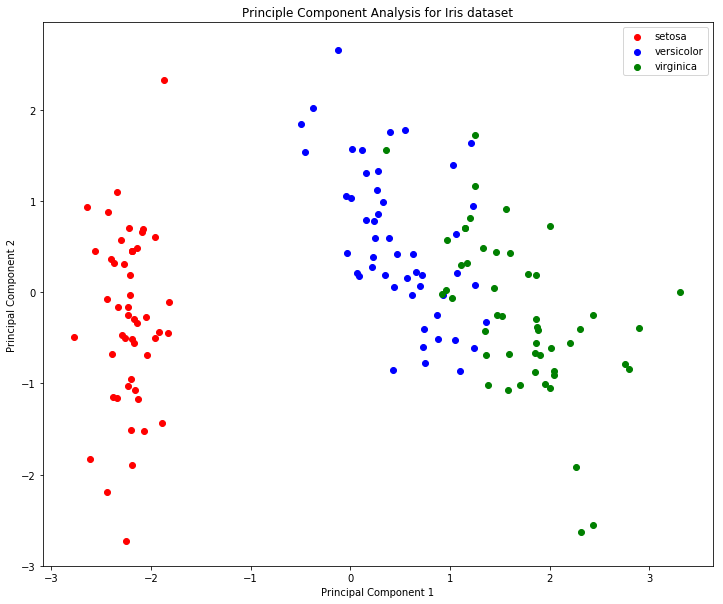

In [21]:
target_names = iris.target_names
y = iris.target
plt.figure(figsize=(12,10))
for c, i, tar in zip("rbg", [0, 1, 2], target_names):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=tar)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Principle Component Analysis for Iris dataset')
plt.savefig('PCA Plot')
plt.show()